# Table Of Content

- Introduction
- Loading and Understanding the Dataset
    - Importing Libraries
    - Loading the Dataset
    - Basic Stats of the Dataset
    - Data Cleaning
    - Datakey Analysis
- Data Transformation and Exploration
    - Decoding and Splitting the Data
    - Analyzing Distributions of the Target Variable
    - Analyzing Distributions of Continuous Variables
    - Analyzing Distributions of Categorical Variables
- Bivariate Analysis
    - Distribution of participants by Age and Gender
    - Age and Match Success
    - Importance of Shared Religion and Race
    - Correlations between Likability and Various Attributes
    - Comparison of Mean Ratings of Various Attributes
    - Influence of Date Order on Match Success
- Participant Scores and Match Outcomes
    - Participant Scores with and without Matches
    - Correlation Between Participants and Match Success
    - Being of Same Racial Background and Match Success
    - Age Difference Between Participants
    - Discrepancy in Perceived Attributes
- Conclusion

# Introduction

Welcome to our comprehensive exploratory analysis of the Speed Dating Experiment dataset. In this notebook, we aim to delve deep into the factors influencing a match's outcome with the help of speed dating events, by uncovering patterns, and generating compelling insights.

The Speed Dating Experiment dataset is a rich compilation of data from a series of speed dating events, supplemented with additional information about the participants' preferences, self-perception, and scoring on various attributes.

Throughout this notebook, we tackle multiple aspects of the data. We begin with a cleaning process, addressing missing values and transforming categorical variables to improve data interpretability. The notebook then proceeds with a series of visualizations and analyses focusing on distributions of variables, correlation studies, and bivariate analysis.

Our goal is to try and provide a perspective on what makes people like each other, drawing from various aspects of the participants' demographic information, self-perception, and dating outcomes. By the end of this notebook, we hope to provide valuable insights into the factors that play a role in making a match.

# Loading and Understanding the Dataset

## Importing Libraries

In [1]:
# Install these libraries before running the notebook
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install plotly
# %pip install numpy
# %pip install statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import numpy as np

In [3]:
# Set pandas options to display all columns
pd.options.display.max_columns = None

## Loading the Dataset

In [4]:
# encoding : "ISO-8859-1" must be included in order for the csv to be read properly
data = pd.read_csv("Speed_Dating_Data.csv", encoding = "ISO-8859-1")
speed_dating = data.copy()

## Basic Stats Of the Dataset

In [5]:
# Basic stats about the dataframe
print(f"Number of rows : {speed_dating.shape[0]}")
print()

print("Basic info: ")
print()
speed_dating.info()
print()

print("Dtypes of the columns: ")
display(speed_dating.dtypes.value_counts())
print()

print("Display of speed_dating: ")
display(speed_dating.head())
print()

print("Basics statistics: ")
data_desc = speed_dating.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
missing_values = pd.DataFrame(np.round(100*speed_dating.isnull().sum()/speed_dating.shape[0]), columns=['% missing values'])
display(missing_values)

Number of rows : 8378

Basic info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB

Dtypes of the columns: 


float64    174
int64       13
object       8
Name: count, dtype: int64


Display of speed_dating: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9


Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Percentage of missing values: 


,% missing values
iid,0.0
id,0.0
gender,0.0
idg,0.0
condtn,0.0
...,...
attr5_3,76.0
sinc5_3,76.0
intel5_3,76.0
fun5_3,76.0


In [6]:
# columns with more than 70% of missing values
data = pd.DataFrame(missing_values[missing_values['% missing values'] >= 70]).sort_values(by='% missing values', ascending=False)
print("Columns with more than 70% of missing values:")
print()
print(data)

Columns with more than 70% of missing values:

          % missing values
num_in_3              92.0
numdat_3              82.0
expnum                79.0
sinc7_2               77.0
amb7_2                77.0
amb7_3                76.0
fun5_3                76.0
intel5_3              76.0
sinc5_3               76.0
attr5_3               76.0
shar2_3               76.0
shar7_3               76.0
sinc7_3               76.0
fun7_3                76.0
intel7_3              76.0
attr7_2               76.0
attr7_3               76.0
shar7_2               76.0
fun7_2                76.0
intel7_2              76.0
amb5_3                76.0


In [7]:
# dropping columns with more than 70% of missing values
speed_dating.drop(missing_values[missing_values['% missing values'] >= 70].index, axis=1, inplace=True)
speed_dating.shape

(8378, 174)

Initial observations of the dataset:

- Our dataset is considerably large, consisting of 8378 observations (rows) and 195 variables (columns).

- The variables are of different types - 174 columns are of float64 type, representing continuous numerical data. 13 columns are of int64 type, representing integer data, and the remaining 8 columns are of the object type, most likely representing categorical or textual data.

- A significant challenge in this dataset is the high prevalence of missing values. In fact, some columns have up to 76% missing values. Dealing with such extensive missingness can pose challenges to any subsequent analysis and could lead to misleading results.

    - In particular, there are 21 columns where more than 70% of the data are missing. This threshold was set to ensure that the retained data would provide a reasonable basis for meaningful interpretation. Columns with missingness above this level are unlikely to contribute substantially to our analysis and could, in fact, impede it.
    
    - Consequently, we opted to remove these columns from the dataset as part of our initial data cleaning. The decision to remove or impute data is always context-dependent and should be based on an understanding of why the data are missing and what the implications of the different strategies might be.

- Our target variable for this analysis is the **'match'** column, which indicates whether or not two candidates were a match - in other words, whether they both liked each other. The variable is binary, with '1' indicating a match and '0' indicating no match. This is the primary outcome of interest and the variable we'll aim to predict in our subsequent analyses.

## Datakey Analysis

Detailed Insights from the Speed Dating Data Key:
- After a comprehensive examination of the data key, several notable insights have surfaced that will be valuable in guiding our analysis:

    - The speed dating event was structured into 21 distinctive phases, referred to as 'waves'. Each wave represents a unique round of the event.

    - Not all waves followed the same scoring system. Specifically, the scoring process for waves 6 to 9 differed from the rest, a factor that needs to be taken into account when comparing or aggregating data across waves.

    - The data includes a variety of scores, each capturing a different aspect of the participants' responses or experiences. While some scores were consistently reported by all participants, others were only captured during specific waves. This inconsistency might influence the breadth and depth of our analysis for certain variables.
    
    - Some scores were collected at multiple points throughout the study, marked by the labels '1', 's', '2', and '3', representing different time periods. It's essential to recognize that not every score was recorded at each of these time points. This temporal aspect of the data allows us to observe the evolution of certain variables over time, which can be particularly informative.

# Data Transformation and Exploration

## Decoding and Splitting the Data

This script is a data cleaning and transformation process applied to the 'speed_dating' dataset. Initially, several columns (gender, race, goal, date, match, go_out, date_3) were encoded with numeric values, each representing a different category or response. To improve readability and understandability of the data, these numeric codes are replaced with their corresponding descriptive labels using Python dictionaries and the 'map' function. For example, in the 'gender' column, 0 is replaced with 'Woman' and 1 with 'Man'. This process is referred to as 'decoding'. 

In addition, the dataset is split into two subsets based on the wave of the speed dating event. The first subset includes the data from waves 6 to 9, while the second subset includes data from the remaining waves (1-5 and 10-21). This is done because the scoring method varied for waves 6 to 9, and therefore it might be beneficial to analyze these waves separately from the rest. This illustrates an effective approach to handling variations within the data to ensure accurate analysis.

In [8]:
# Decoding the gender column
gender_dict = {0: 'Woman', 1: 'Man'}
speed_dating['gender'] = speed_dating['gender'].map(gender_dict)

# Decoding the race column
race_dict = {1:'Black/African American',
                            2:'European/Caucasian-American',
                            3:'Latino/Hispanic American',
                            4:'Asian/Pacific Islander/Asian-American',
                            5:'Native American',
                            6:'Other'}
speed_dating['race'] = speed_dating['race'].map(race_dict)

# Decoding the goal column
goal_dict = {
    1: "Seemed like a fun night out",
    2: "To meet new people",
    3: "To get a date",
    4: "Looking for a serious relationship",
    5: "To say I did it",
    6: "Other"}
speed_dating['goal'] = speed_dating['goal'].map(goal_dict)

# Decoding the date column
date_dict = {
    1: "Several times a week",
    2: "Twice a week",
    3: "Once a week",
    4: "Twice a month",
    5: "Once a month",
    6: "Several times a year",
    7: "Almost never"}
speed_dating['date'] = speed_dating['date'].map(date_dict)

# Decoding the dec column
dec_dict = {0: "No", 1: "Yes"}
speed_dating['dec'] = speed_dating['dec'].map(dec_dict)
speed_dating['dec_o'] = speed_dating['dec_o'].map(dec_dict)
# Decoding the match column
match_dict = {0: "No match", 1: "Match"}
speed_dating['match'] = speed_dating['match'].map(match_dict)

# Decoding the go_out column
go_out_dict = {
    1: "Several times a week",
    2: "Twice a week",
    3: "Once a week",
    4: "Twice a month",
    5: "Once a month",
    6: "Several times a year",
    7: "Almost never"}
speed_dating['go_out'] = speed_dating['go_out'].map(go_out_dict)

# Decoding the date_3 column
date_3_dict = {0: "No", 1: "Yes"}
speed_dating['date_3'] = speed_dating['date_3'].map(date_3_dict)

# Separate the waves
waves_6_9 = speed_dating['wave'].between(6, 9, inclusive='both')
waves_1_5_10_21 = ~speed_dating['wave'].between(6, 9, inclusive='both')

In [9]:
# Define dictionaries to translate coded values to meaningful descriptions
description_dict = {
    '1': 'What you look for in the opposite sex',
    '2': 'What do you think the opposite sex looks for in a date',
    '3': 'How do you think you measure up',
    '4': 'What you think MOST of your fellow men/women look for in the opposite sex',
    '5': 'How do you think others perceive you? ',
    '7': 'Think back to your yes/no decisions during the Speed Dating event and reflect'
}

attribute_dict = {
    'attr': 'Attractive',
    'sinc': 'Sincere',
    'intel': 'Intelligence',
    'fun': 'Funny',
    'amb': 'Ambition',
    'shar': 'Shared interests',
}

time_dict = {
    '1': 'At the beginning of the event',
    's': 'Halfway through the event',
    '2': 'At the end of the event',
    '3': 'After the event'
}  

In [10]:
# To group every group of attributes based on their description and time codes,
# we create a function that will return a dictionary with the grouped columns
def group_columns(df):
    columns = df.columns
    desc_codes = ['1','2','3','4','5','7']
    time_codes = ['1','s','2','3']

    # Initialize an empty dictionary to store the grouped columns
    grouped_columns_dict = {}

    for desc_code in desc_codes:
        for time_code in time_codes:
                grouped_columns = [column for column in columns if f"{desc_code}_{time_code}" in column]
                if grouped_columns:  # Check if group_columns is not empty
                    grouped_columns_dict[f"{desc_code}_{time_code}"] = grouped_columns

    return grouped_columns_dict

In [11]:
# Display the grouped columns
scores_dict = group_columns(speed_dating)
print("Display of scores_dict: ")
display(scores_dict)

Display of scores_dict: 


{'1_1': ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'],
 '1_s': ['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s'],
 '1_2': ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2'],
 '1_3': ['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3'],
 '2_1': ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1'],
 '2_2': ['attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2'],
 '2_3': ['attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3'],
 '3_1': ['attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1'],
 '3_s': ['attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s'],
 '3_2': ['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2'],
 '3_3': ['attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3'],
 '4_1': ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1'],
 '4_2': ['attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2'],
 '4_3': ['attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3'],
 '5_1

## Analyzing Distributions of the Target Variable

Our target variable, which represents whether or not a match was made, shows a significant skew. In fact, matches were only made in 16% of the dates.

In [12]:
# Distribution of match rates
fig = px.pie(speed_dating["match"].value_counts(normalize=True), names=["No Match", "Match"], values="proportion", title="Match Percentage")
fig.show()

In [13]:
fig.write_html("match_percentage.html")

## Analyzing Distributions of Continuous Variables



In this segment of the analysis, we're looking at the distribution of various unique characteristics of each participant. We start by removing duplicates from the dataset, keeping only one entry for each unique participant, identified by their individual ID ("iid").

The characteristics we're focusing on include the importance participants place on race ("imprace") and religion ("imprelig"), the age of participants ("age"), the number of contacts they initiated to set up dates ("you_call"), and how many participants contacted them ("them_cal").

For each of these features, we generate a histogram using Plotly Express to visualize the distribution of values. These histograms provide insights into the range, central tendency, and skewness of the data for each characteristic.

By visualizing these distributions, we can better understand the characteristics of the speed dating participants, which can be valuable for subsequent analyses.

In [14]:
cont_features = ["imprace", "imprelig", "age", "you_call", "them_cal"]
cont_title = ["Importance of race", "Importance of religion", "Age of participants", "How many have you contacted to set up a date?", "How many have contacted you?"]
unique_data = speed_dating.drop_duplicates(subset=["iid"])
for feature,title in zip(cont_features, cont_title):
    fig = px.histogram(unique_data, x=feature, labels = {feature:title} )
    fig.update_yaxes(title="Count")
    fig.show()
    fig.write_html(f"{feature}_count.html")

We created the below function to normalize the scores since different scales have been used. However normalizing scores that originally range from 1 to 10 may not accurately reflect the participant's intentions. The reason is that participants might pay less attention to their precise scores when using a 1-10 scale, while they may distribute their points more thoughtfully when given a limited 100 point scale to work with. Therefore, transforming a 1-10 scale to a 0-100 point scale might introduce some distortion or bias in the interpretation of the data.

In [15]:
# Function to normalize the ratings (100 pts and 1-10 pts scales)
def normalize_ratings(data, scores):
    normalized_data = data.copy()
    # Calculate the sum for each row along the specified scores list
    normalized_data['col_sum'] = normalized_data[scores].sum(axis=1)
    # Normalize the scores by dividing them by row_sums and multiplying by 10
    normalized_data[scores] = normalized_data[scores].divide(normalized_data['col_sum'], axis=0) * 100
    normalized_data[scores] = normalized_data[scores].round(decimals=0)
    normalized_data.drop('col_sum', axis=1, inplace=True)

    return normalized_data

This function plot_distplot generates and displays density distribution plots for various attributes at different times during a speed dating event. These attributes include 'Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', and 'Shared Interests'. You can choose to normalize the data before plotting. The function uses Plotly Figure Factory's create_distplot to create the distributions.

In [17]:
def plot_distplot(df, time:str, normalize = False):
    """
    Creates and displays density distribution plots for various attributes
    at different times during a speed dating event.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the speed dating data.
    time (str): The time point during the event. The valid values are '1', 's', '2', '3', which correspond to:
                    '1': 'At the beginning of the event',
                    's': 'Halfway through the event',
                    '2': 'At the end of the event',
                    '3': 'After the event'
    normalize (bool): Whether to normalize the ratings or not. The default is False.

    Returns:
    None. This function displays the plots directly.
    """
    global attribute_dict
    global scores_dict
    global time_dict


    # Filter keys based on time point
    keys = [key for key in scores_dict.keys() if key[-1] == time]
    new_scores_dict = {key: scores_dict[key] for key in keys}

    # Loop over keys to generate and display plots
    for key, value in new_scores_dict.items():
        data = df[value].dropna()
        # Normalize ratings if required
        if normalize == True:
            data = normalize_ratings(data, value)
            is_norm = 'Normalized'
        else:
            is_norm = 'Unnormalized'

        try:
            # Condition to handle the absence of 'shar' attribute
            if len(value) == 6: 
                fig = ff.create_distplot([data[c] for c in data.columns], list(attribute_dict.values()), show_hist=False, show_rug=False, show_curve=True)
            else:
                fig = ff.create_distplot([data[c] for c in data.columns], list(attribute_dict.values())[:-1], show_hist=False, show_rug=False, show_curve=True)

            # Update plot layout and display
            fig.update_layout(title=f'{description_dict[key[0]]} - {time_dict[key[-1]]}')
            fig.update_xaxes(title_text=f'{is_norm} Ratings')
            fig.update_yaxes(title_text='Density Distribution')
            fig.show()
            fig.write_html(f"{key}.html")

        except:
            pass


- Leveraging the capabilities of Plotly's Figure Factory, we have generated Kernel Density Estimation (KDE) plots for various attributes. These plots reveal that the majority of the scores fall within the 10 to 30 range.

- The 'Attractiveness' attribute stands out with its smoother distribution across the scale, suggesting that participants view attractiveness as a distinct quality.

- A noteworthy observation is the high-density values for the 'Funny' and 'Intelligence' attributes. This suggests participants often assign significant importance to these traits by default.

- For our analysis, we chose to primarily focus on the attributes from time period '1' due to their comprehensive nature. However, our versatile plotting function allows us to explore different time periods, choose whether to normalize the data or not, and slice our dataset as needed (for instance, analyzing different wave groups).

In [18]:
plot_distplot(unique_data, time='1', normalize=True)

## Analyzing Distributions of Categorical Variables

- Insights on Participant Demographics:
  - A significant majority, over 60%, of the participants identify as Caucasian, followed by those of Asian descent.

- Participant Intentions and Activity:
  - The primary motivators for most participants attending the event were the allure of a fun evening and the opportunity to meet new people.

- Dating Frequency Among Participants:
  - Roughly half of the participants indulge in dating multiple times a year or twice a month.
- Social Outings Among Participants:

  - Approximately 70% of participants engage in social activities twice a week or even more frequently.
- Post-Event Dating Success:

  - Remarkably, around 40% of participants pursued further dates with at least one individual they met during the speed dating event.

In [19]:
cat_variables = ["race", "goal", "date", "go_out", 'dec', 'dec_o', "date_3"]
cat_titles = ["Racial Background", "Goal of participation", "Frequency of dating", "Frequency of going out", "Decision after the date", "Decision of the other participant", "Did you go on a date with any of your matches?"]
data = unique_data[cat_variables].value_counts().reset_index()
for feature, title in zip(cat_variables, cat_titles):
    fig = px.pie(data, names=feature, title=title)
    fig.show()
    fig.write_html(f"{feature}_pie.html")

# Bivariate Analysis

## Distribution of participants by Age and Gender

We revisited the distribution of participants' ages, grouping by the individual identifiers (iid) ensuring uniqueness. Upon grouping this distribution by gender, it becomes apparent that the age distribution is fairly consistent between men and women.

In [20]:
# Age distribution by gender
def plot_age_distribution(data, nbins=30):
    fig = px.histogram(data, y='age', facet_col='gender', color='gender', barmode='overlay', 
                       nbins=nbins, facet_col_spacing=10**-9, title='Distribution of participants by Age and Gender',
                       labels={'gender':'Gender'})
    fig.update_xaxes(matches=None)
    fig.update_xaxes(col=1, range=[50, 0], title='')
    fig.update_xaxes(col=2, range=[0, 50], title='')
    fig.update_yaxes(col = 1,title='Age')
    fig.update_layout({'annotations': [{'text': ''}],
        'title_x': 0.5, # Set the horizontal position of the title to the middle
    })    
    fig.show()
    fig.write_html("age_gender_distribution.html")

plot_age_distribution(unique_data)

## Age and Match Success

A chart depicting 'Matches by Age Groups' showcases the average match rate across different age brackets. The highest match rate of 23% is seen in the 18-25 years age group.

In [21]:
# Matches by age group:
data = speed_dating.groupby(['iid','age'])['match'].value_counts(normalize=True).reset_index(name='Proportion')
data = data[data['match'] == 'Match']
age_groups = pd.cut(data['age'], bins=[18, 25, 35, 45, 55], labels=['18-25', '26-35', '36-45', '46-55'])
matches_by_age_group = data.groupby(age_groups)['Proportion'].mean().reset_index()

fig = px.bar(matches_by_age_group, x=matches_by_age_group['age'], y=matches_by_age_group['Proportion'], title='Matches by Age Group', labels={'age':'Age Group'})
fig.show()
fig.write_html("matches_by_age_group.html")

## Importance of Shared Religion and Race

The majority of participants don't consider shared religion or race as pivotal factors in their dating decisions. More particularly, men assign less importance to these factors than women do.

In [22]:
# Distribution of importance of religion and race for men and women
def plot_importance_of_race_religion(data):
    data_race = data.groupby('gender')['imprace'].mean().reset_index()
    fig = px.bar(data_race, x='gender', y='imprace', color='gender',
                 labels={'gender':'Gender', 'imprace':'Importance of Race (1-10)'}, 
                 title='Average Importance of Race in Dating by Gender')
    fig.show()
    fig.write_html("importance_of_race.html")

    data_relig = data.groupby('gender')['imprelig'].mean().reset_index()
    fig = px.bar(data_relig, x='gender', y='imprelig', color='gender',
                 labels={'gender':'Gender', 'imprelig':'Importance of Religion (1-10)'}, 
                 title='Average Importance of Religion in Dating by Gender')
    fig.show()
    fig.write_html("importance_of_religion.html")

plot_importance_of_race_religion(unique_data)

## Correlations between Likability and Various Attributes

By crafting a correlation matrix using the scores, we aimed to examine the relationships between participants' likability and their various attributes. It emerges that shared interests, attractiveness, and humor are the attributes most closely associated with likability.

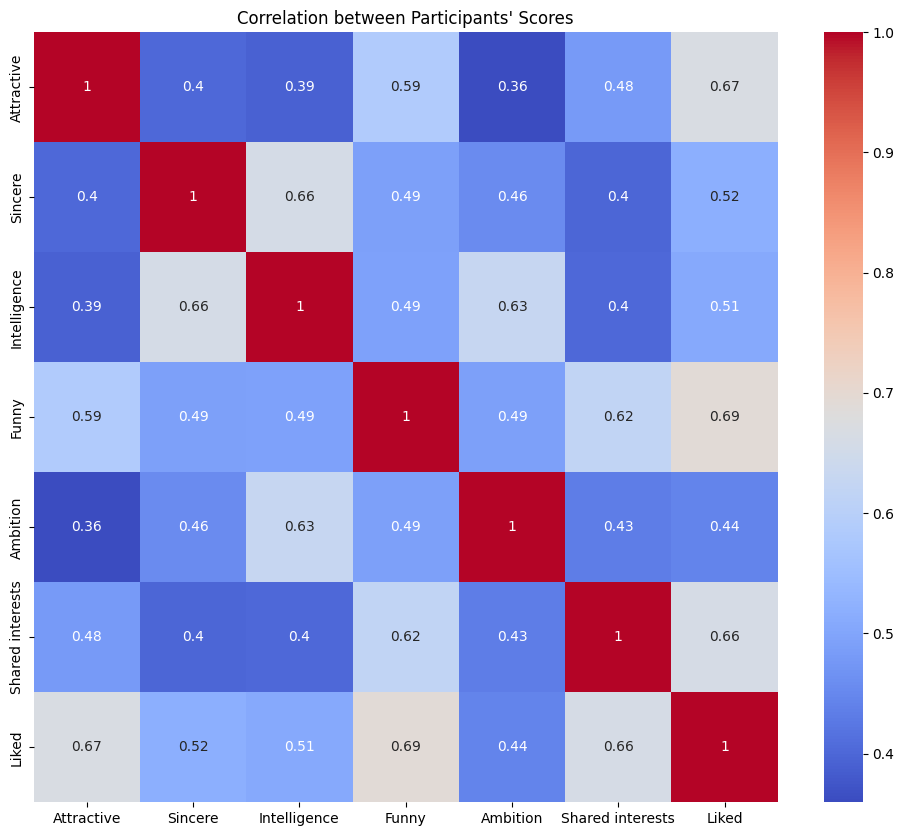

<Figure size 640x480 with 0 Axes>

In [23]:
scores = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']
# Correlation between participants' interests and match rates
def plot_correlation(data,columns: list):
    att_dict = {
    'attr': 'Attractive',
    'sinc': 'Sincere',
    'intel': 'Intelligence',
    'fun': 'Funny',
    'amb': 'Ambition',
    'shar': 'Shared interests',
    'like': 'Liked'}
    interest_corr = data[columns].corr().rename(columns=att_dict, index=att_dict)
    _ , ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(interest_corr, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Correlation between Participants\' Scores')
    plt.show()
    plt.savefig("correlation.png")
plot_correlation(speed_dating, scores)

## Comparison of Mean Ratings of Various Attributes

This below code performs a sequence of data processing and visualization operations to produce grouped bar plots showing the mean scores of various attributes at the beginning of the speed dating event for men and women separately.

- A closer inspection of these charts unveils an intriguing trend: participants appear more conservative when assessing their own attributes. On the contrary, when estimating the attributes of other participants, particularly attractiveness, there's a tendency for these scores to be inflated.

- Men give more importance to attractiveness followed by intelligence and funniness while women assign a bigger importance to intelligence followed by sincerity then attractiveness when it comes to what they look for in the opposite sex.

- Both men and women consider by far attractiveness as the attribute the opposite sex looks for in a partner.

- When it comes to how they think they measure up. Both men and women are relatively modest as there are no particular attributes that stand out. They both consider that that their best attributes are intelligence and sincerity.

- Both men and women consider by far attractiveness as the attribute their fellow men/women look for in a partner this time.

- Finally when it comes to how others perceive the participants, we can observe the same trend as to how they think they measure up.

In [24]:
data_all = pd.DataFrame()
# Filter keys based on time period
keys = [key for key in scores_dict.keys() if key[-1] == '1']
new_scores_dict = {key: scores_dict[key] for key in keys}
# Iterate over each key in the new_scores_dict
for key,value in new_scores_dict.items():
    # Generate data and add description and time columns (we use unique data because these ratings are unique for each participant)
    data = normalize_ratings(unique_data, value)
    #data = unique_data.copy()
    data = data.groupby('gender')[value].mean().reset_index()
    data['description'] = description_dict[key[0]]
    data['time'] = time_dict[key[-1]]
    # Append to the data_all dataframe
    data_all = pd.concat([data_all, data], axis=0)
# Melt the dataframe
data_melted = data_all.melt(id_vars=['gender', 'description', 'time'], var_name='attribute', value_name='average_rating')
# Translate the attribute column to the meaningful description
data_melted['attribute'] = data_melted['attribute'].apply(lambda x: attribute_dict[x[:-3]])

# Plot the data
fig = px.bar(data_melted, x='attribute', y='average_rating', color='gender', barmode='group', labels={'average_rating':'Average Rating', 'attribute':'Attributes', 'gender': 'Gender'}, 
             title='Average Ratings of Participants at the beginning of the event', facet_col='description', facet_col_wrap=1, height=1000)

fig.for_each_annotation(lambda x: x.update(text = x.text.split("=")[1]))

fig.show()
fig.write_html("average_ratings.html")

## Influence of Date Order on Match Success

Our analysis sought to investigate the influence of date orders on the match success rate. To visualize this, we generated a scatter plot mapping the order of the dates against match outcomes. Intriguingly, we found out a decreasing trend in the likelihood of a match as the speed dating event progresses. This could potentially be due to fatigue setting in among participants, impacting their receptivity and engagement levels as the event unfolds.

In [25]:
# The effect of being the first or last speed date of the night on getting a second date:
order_vs_match = speed_dating.groupby('order')['match'].value_counts(normalize=True).reset_index()
order_vs_match = order_vs_match[order_vs_match['match'] == 'Match']
fig = px.scatter(order_vs_match, x='order', y='proportion', trendline='ols', title='Effect of Speed Date Order on Second Date Likelihood', labels={'order':'Order of Speed Date', 'proportion':'Likelihood of Second Date'})
fig.show()
fig.write_html("order_vs_match.html")

# Participant Scores and Match Outcomes

## Participant Scores with and without Matches

By plotting the average scores of participants with and without matches, we can deduce a couple of interesting observations:

- With no surprise, The participants' scores are higher on average when matched compared to scores without matches.

- The highest scored attribute when matched is Intelligence.

- The lowest scored attribute when a match didn't occur is Shared interests.

In [26]:
# Plotting the score cards average of participants with and without a match:
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like']
att_dict = {'attr': 'Attractive',
            'sinc': 'Sincere',
            'intel': 'Intelligence',
            'fun': 'Funny',
            'amb': 'Ambition',
            'shar': 'Shared interests',
            'like': 'Liked'}
data = speed_dating.groupby('match')[attributes].mean().reset_index()
# Melt the dataframe
data_melted = data.melt(id_vars='match', var_name='attribute', value_name='average_score')
data_melted['attribute'] = data_melted['attribute'].apply(lambda x: att_dict[x])

# Plot the data
fig = px.bar(data_melted, x='attribute', y='average_score', color='match', barmode='group', 
             title='Average Scores Card of Participants with and without a Match', labels={'average_score':'Average Score', 'attribute':'Attributes', 'match': 'Match'},)
fig.show()
fig.write_html("average_score.html")

## Correlation of Interests Between Participants and Match Success

The average correlation between a participant and their date is slightly higher when matched.

In [27]:
# Plotting the interests correlation average of participants with and without a match:
attributes = ['int_corr']
att_dict = {'int_corr': 'Correlation between Interests'}
data = speed_dating.groupby('match')[attributes].mean().reset_index()
# Melt the dataframe
data_melted = data.melt(id_vars='match', var_name='attribute', value_name='average_score')
data_melted['attribute'] = data_melted['attribute'].apply(lambda x: att_dict[x])
# Plot the data
fig = px.bar(data_melted, x='attribute', y='average_score', color='match', barmode='group', 
             title='Average Correlation between Interests of Participants with and without a Match',
             labels={'average_score':'Average Correlation', 'attribute':'Attributes', 'match': 'Match'},)
fig.show()
fig.write_html("average_correlation_interests.html")


## Being of Same Racial Background and Match Success

Similarly, the proportion of couples being of the same racial background is slightly bigger when matched.

In [28]:
# Plotting the proportion of being of the same race with and without a match:
attributes = ['samerace']
att_dict = {'samerace': "Partners are of the same race"}
data = speed_dating.groupby('match')[attributes].mean().reset_index()
# Melt the dataframe
data_melted = data.melt(id_vars='match', var_name='attribute', value_name='average_score')
data_melted['attribute'] = data_melted['attribute'].apply(lambda x: att_dict[x])

# Plot the data
fig = px.bar(data_melted, x='attribute', y='average_score', color='match', barmode='group', 
             title='Proportion of Participants of the same race with and without a Match',
             labels={'average_score':'Proportion', 'attribute':'Attributes', 'match': 'Match'},)
fig.show()
fig.write_html("average_proportion_race.html")

## Age Difference Between Participants

We decided to plot the average age difference between couples and we can observe a slight but noticeable difference. Matched couples tend to have a smaller age gap compared to unmatched couples.

In [29]:
# Next up comparison between age of participant and partner and how that affects the match 
attributes = ['age_diff']
att_dict = {'age_diff': "Age difference between partners"}
# Calculate the absolute age difference
speed_dating['age_diff'] = abs(speed_dating['age'] - speed_dating['age_o'])
# Group by match and calculate the mean age difference
data = speed_dating.groupby('match')[attributes].mean().reset_index()
# Melt the dataframe
data_melted = data.melt(id_vars='match', var_name='attribute', value_name='average_score')
data_melted['attribute'] = data_melted['attribute'].apply(lambda x: att_dict[x])
# Plot the data
fig = px.bar(data_melted, x='attribute', y='average_score', color='match', barmode='group', 
             title='Average Age Difference between Partners with and without a Match',
             labels={'average_score':'Average Age Difference', 'attribute':'Attributes', 'match': 'Match'},)
fig.show()
fig.write_html("average_age_difference.html")

## Discrepancy in Perceived Attributes

- We decided to investigate and visually represent the discrepancy between the way speed dating participants perceive themselves (in terms of attractiveness, sincerity, intelligence, humor, and ambition) and the way their partners rate them, and how these differences might impact the likelihood of a match.
- Our analysis reveals a narrower discrepancy in perceived attributes when a match is established, compared to situations where no match occurs. Furthermore, when there isn't a match, the attribute that presents the most significant difference in perception is intelligence.

In [30]:
# Plotting the difference between how the participant rated themselves and how their partner rated them:
attributes = scores_dict['3_1']
attributes_other = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']
att_dict = {'attr': 'Attractive',
            'sinc': 'Sincere',
            'intel': 'Intelligence',
            'fun': 'Funny',
            'amb': 'Ambition'}

# Calculate the difference between the scores
temp = speed_dating.copy()
for att, att_other in zip(attributes, attributes_other):
    temp[att] = abs(temp[att] - temp[att_other])

# Group by match and calculate the average difference
data = temp.groupby('match')[attributes].mean().reset_index()
# Melt the dataframe
data_melted = data.melt(id_vars='match', var_name='attribute', value_name='average_score')
data_melted['attribute'] = data_melted['attribute'].apply(lambda x: att_dict[x[:-3]])

# Plot the data
fig = px.bar(data_melted, x='attribute', y='average_score', color='match', barmode='group', 
             title='How do you think you measure up vs How your partner thinks you measure up',
             labels={'average_score':'Average Difference', 'attribute':'Attributes', 'match': 'Match'},)
fig.show()
fig.write_html("average_difference_attrs.html")


# Conclusion

In this comprehensive speed dating analysis, several factors influencing match outcomes were identified. Key influences included participants' self-perceptions and the perceptions of their dates. The order of dates during the event, and participants' attributes such as shared interests, attractiveness, and humor, also significantly impacted match success. Additionally, matches were more likely when participants had similar ages, the same racial background, and higher mutual interest. Lastly, participants generally viewed themselves more conservatively compared to their assessments of their dates, particularly in terms of attractiveness. This analysis offers valuable insights, although its findings may not be universally applicable to all speed dating contexts.